#### Multiple Linear Regression Assignment

Using [Multiple Linear Regression Housing Case Study
](https://www.kaggle.com/datasets/gauravbr/multiple-linear-regression-housing-price-detection/data?select=Housing.csv) dataset

In this assignment, I've used data on house sales in King County to predict prices using multiple regression.


- Data Loading and Cleaning
- Categorical Encoding
- Full Model Fitting
- ANOVA Test
- T-Tests and P-Values
- Regressor Line Visualization
- Prediction
- R² and Adjusted R²
- Variable Reduction
- Reduced Model Analysis

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f

In [9]:
df = pd.read_csv('Housing.csv')
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())
df = df.dropna()
print(f"Dataset shape after dropping missing values: {df.shape}")


Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Dataset shape after dropping missing values: (545, 13)


In [11]:
y = df['price']
X = df.drop('price', axis=1)

In [12]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("\nFirst few rows of X after encoding:")
print(X.head())


First few rows of X after encoding:
   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  f

In [15]:
X = sm.add_constant(X)

In [16]:
print("X dtypes:\n", X.dtypes)
print("y dtype:", y.dtype)

X dtypes:
 const                              float64
area                                 int64
bedrooms                             int64
bathrooms                            int64
stories                              int64
parking                              int64
mainroad_yes                          bool
guestroom_yes                         bool
basement_yes                          bool
hotwaterheating_yes                   bool
airconditioning_yes                   bool
prefarea_yes                          bool
furnishingstatus_semi-furnished       bool
furnishingstatus_unfurnished          bool
dtype: object
y dtype: int64


In [18]:
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [17]:
X = X.dropna()
y = y.loc[X.index]

In [19]:
print("X_np dtype:", np.asarray(X).dtype)
print("y_np dtype:", np.asarray(y).dtype)

X_np dtype: object
y_np dtype: int64


In [46]:
model_full = sm.OLS(y, X.astype(float)).fit()

In [47]:
ssr = model_full.ssr  # Sum of squared residuals
sst = ((y - y.mean())**2).sum()  # Total sum of squares
sse = sst - ssr  # Explained sum of squares
df_residual = model_full.df_resid  # Residual degrees of freedom
df_model = model_full.df_model  # Model degrees of freedom
msr = ssr / df_residual  # Mean squared residual
mse = sse / df_model  # Mean squared explained
f_stat = mse / msr  # F-statistic

p_value = 1 - f.cdf(f_stat, df_model, df_residual)

anova_table = pd.DataFrame({
    'Source': ['Model', 'Residual', 'Total'],
    'Sum Sq': [sse, ssr, sst],
    'Df': [df_model, df_residual, len(y) - 1],
    'Mean Sq': [mse, msr, None],
    'F': [f_stat, None, None],
    'p-value': [p_value, None, None]
})
print("\nManual ANOVA for Reduced Model:")
print(anova_table)



Manual ANOVA for Reduced Model:
     Source        Sum Sq     Df       Mean Sq          F       p-value
0     Model  1.297611e+15   13.0  9.981622e+13  87.520883  1.110223e-16
1  Residual  6.055973e+14  531.0  1.140485e+12        NaN           NaN
2     Total  1.903208e+15  544.0           NaN        NaN           NaN


In [50]:
print("\Full Model Summary Summary (includes t-tests, p-values for hypothesis testing):")
print(model_full.summary())


\Full Model Summary Summary (includes t-tests, p-values for hypothesis testing):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          9.07e-123
Time:                        22:52:25   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

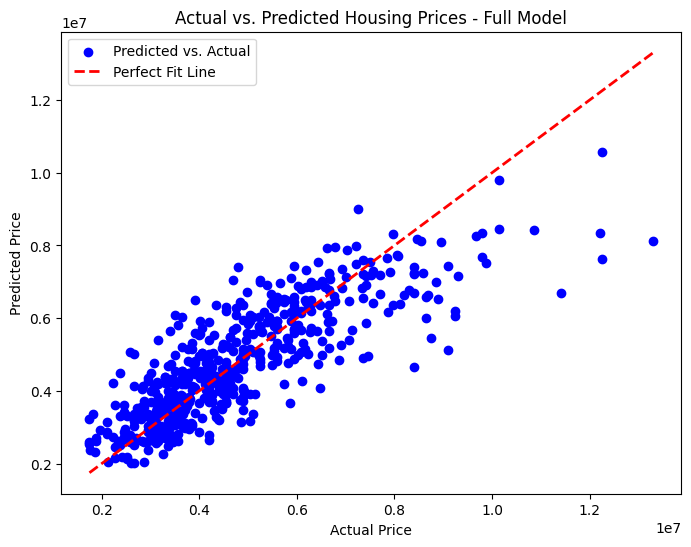

In [28]:
y_pred_full = model_full.predict(X_full)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, color='blue', label='Predicted vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Housing Prices - Full Model')
plt.legend()
plt.show()

In [29]:
new_data_full = X_full.iloc[0:1, :]
predicted_price_full = model_full.predict(new_data_full)
print(f'\nPredicted price for the first house (Full Model): {predicted_price_full[0]}')


Predicted price for the first house (Full Model): 8133305.306532795


In [30]:
r2_full = model_full.rsquared
adj_r2_full = model_full.rsquared_adj
print(f'Full Model R²: {r2_full}')
print(f'Full Model Adjusted R²: {adj_r2_full}')

Full Model R²: 0.6818018485540142
Full Model Adjusted R²: 0.6740116866542065


In [31]:
pvalues_full = model_full.pvalues.drop('const')  # Exclude the constant term
least_significant_var = pvalues_full.idxmax()
print(f'\nLeast significant variable: {least_significant_var} with p-value: {pvalues_full[least_significant_var]}')


Least significant variable: furnishingstatus_semi-furnished with p-value: 0.6911179481973987


In [32]:
X_reduced = X_full.drop(least_significant_var, axis=1)

### Reduced Model Analysis

In [34]:
model_reduced = sm.OLS(y, X_reduced.astype(float)).fit()

In [ ]:
ssr = model_reduced.ssr  # Sum of squared residuals
sst = ((y - y.mean())**2).sum()  # Total sum of squares
sse = sst - ssr  # Explained sum of squares
df_residual = model_reduced.df_resid  # Residual degrees of freedom
df_model = model_reduced.df_model  # Model degrees of freedom
msr = ssr / df_residual  # Mean squared residual
mse = sse / df_model  # Mean squared explained
f_stat = mse / msr  # F-statistic

p_value = 1 - f.cdf(f_stat, df_model, df_residual)

anova_table = pd.DataFrame({
    'Source': ['Model', 'Residual', 'Total'],
    'Sum Sq': [sse, ssr, sst],
    'Df': [df_model, df_residual, len(y) - 1],
    'Mean Sq': [mse, msr, None],
    'F': [f_stat, None, None],
    'p-value': [p_value, None, None]
})
print("\nManual ANOVA for Reduced Model:")
print(anova_table)



Manual ANOVA for Reduced Model:
     Source        Sum Sq     Df       Mean Sq         F       p-value
0     Model  1.297431e+15   12.0  1.081192e+14  94.95139  1.110223e-16
1  Residual  6.057776e+14  532.0  1.138680e+12       NaN           NaN
2     Total  1.903208e+15  544.0           NaN       NaN           NaN


In [36]:
print("\nReduced Model Summary (includes t-tests, p-values for hypothesis testing):")
print(model_reduced.summary())


Reduced Model Summary (includes t-tests, p-values for hypothesis testing):
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     94.95
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          9.85e-124
Time:                        22:46:29   Log-Likelihood:                -8331.6
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

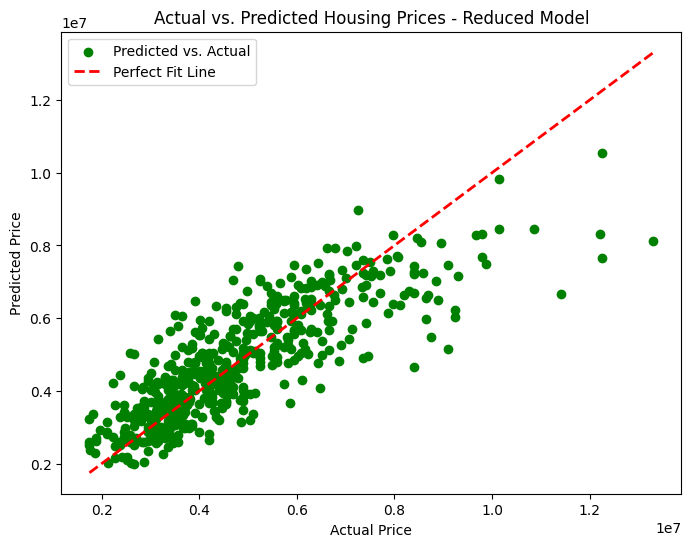

In [37]:
y_pred_reduced = model_reduced.predict(X_reduced)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_reduced, color='green', label='Predicted vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Housing Prices - Reduced Model')
plt.legend()
plt.show()

In [38]:
new_data_reduced = X_reduced.iloc[0:1, :]
predicted_price_reduced = model_reduced.predict(new_data_reduced)
print(f'\nPredicted price for the first house (Reduced Model): {predicted_price_reduced[0]}')


Predicted price for the first house (Reduced Model): 8110632.71452224


In [39]:
r2_reduced = model_reduced.rsquared
adj_r2_reduced = model_reduced.rsquared_adj
print(f'Reduced Model R²: {r2_reduced}')
print(f'Reduced Model Adjusted R²: {adj_r2_reduced}')

Reduced Model R²: 0.6817071381430335
Reduced Model Adjusted R²: 0.6745275999056584
